In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
dataframe = pd.read_csv('C:\\Users\\fgene\\OneDrive\\Documents\\GlobularCluster.csv')

In [4]:
dataset = dataframe.copy()
dataset.tail()

,GalLong,GalLat,Rsol,RGC,Metal,Mv,rCore,rTidal,Conc,logT,logRho,S0,Vesc,VHB,EBV,BV,Ellipt,Vt,CSBt
142,53.37,-35.77,11.9,10.9,-1.8,-9.1,1.2,56.4,1.8,8.4,4.0,9.0,37.1,16.1,0.0,0.8,6.3,6,7.2
143,27.18,-46.84,7.2,7.2,-2.2,-7.2,0.2,33.4,2.4,6.6,5.3,5.2,23.8,15.1,0.1,0.7,7.3,2,6.3
144,30.51,-47.68,19.4,16.0,-1.1,-4.8,2.7,60.4,1.5,8.4,1.4,1.0,4.0,17.1,0.0,0.9,11.7,1,12.9
145,87.10,-42.70,24.4,25.7,-1.0,-3.3,2.7,27.0,0.9,8.3,1.2,0.8,2.7,17.7,0.1,1.0,13.8,0,13.5
146,53.39,-63.48,19.1,18.7,-1.8,-5.0,4.5,42.0,1.1,8.8,1.1,1.1,4.1,17.0,0.0,0.7,11.4,3,13.1


In [5]:
dataset.isna().sum()

GalLong     0
GalLat      0
Rsol        0
RGC         1
Metal      13
Mv          0
rCore       0
rTidal      0
Conc       31
logT        0
logRho      0
S0          0
Vesc        0
VHB         0
EBV         0
BV         13
Ellipt      0
Vt          0
CSBt        1
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

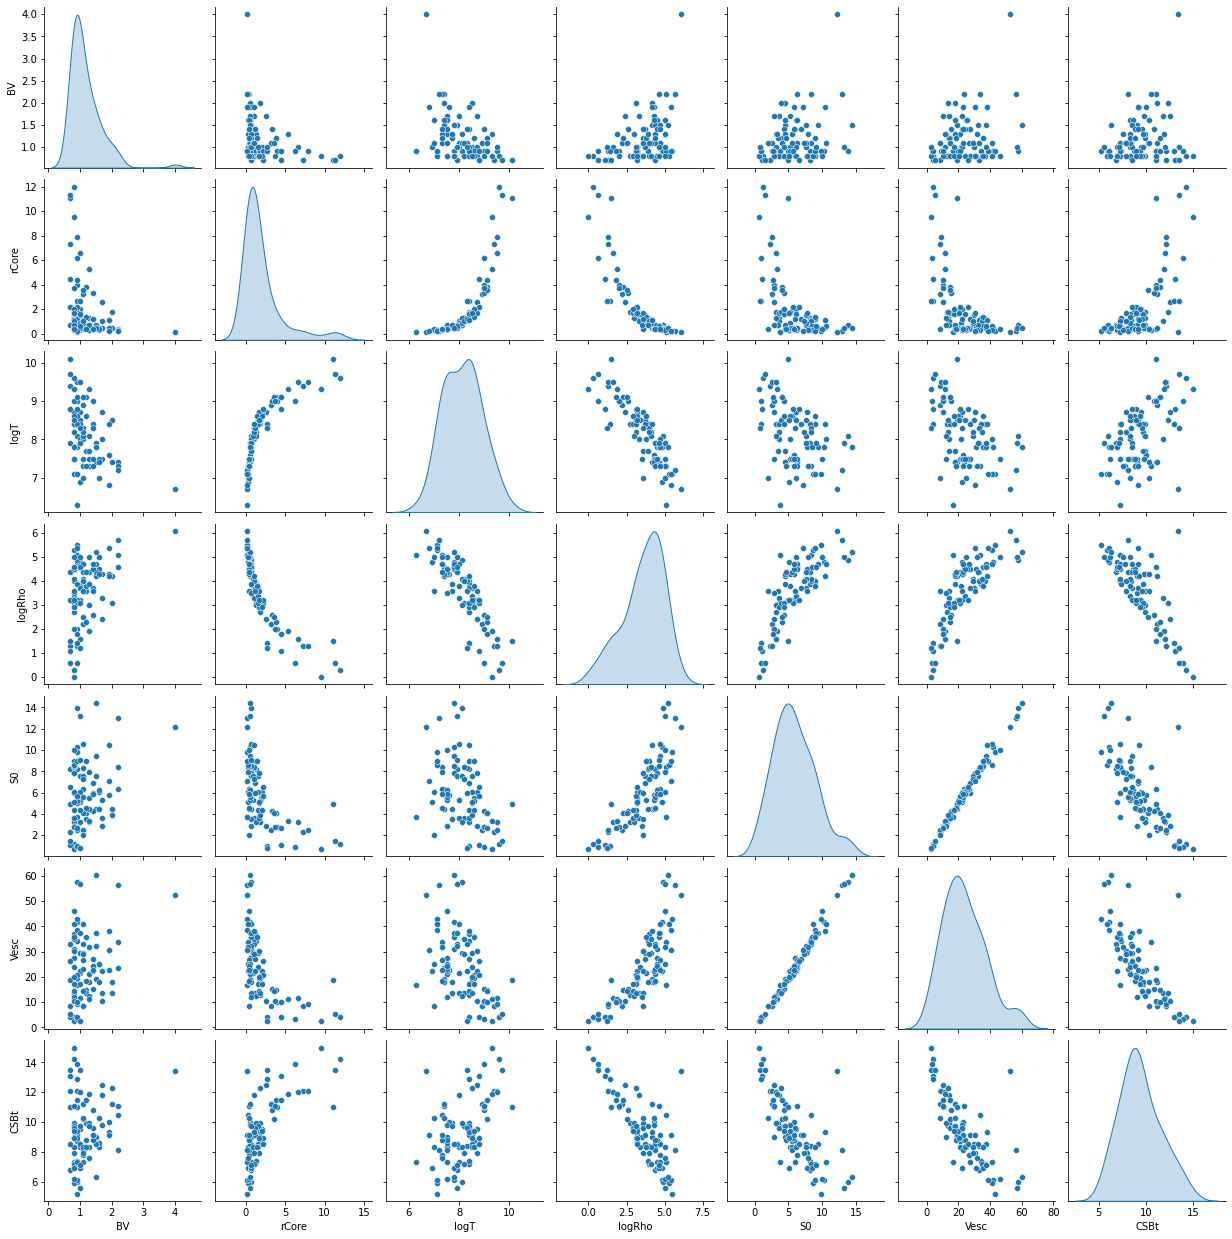

In [112]:
sns.pairplot(train_dataset[['BV', 'rCore', 'logT', 'logRho', 'S0', 'Vesc', 'CSBt']], diag_kind='kde')

In [15]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GalLong,90.0,169.576000,148.724545,0.07,16.3925,160.84,330.190,358.92
GalLat,90.0,0.386333,30.972702,-89.38,-15.7675,-3.22,10.675,79.76
Rsol,90.0,15.250000,19.056611,2.60,6.8250,9.25,15.800,116.40
RGC,90.0,13.125556,20.474975,0.90,3.2000,6.65,14.475,117.90
Metal,90.0,-1.407778,0.521930,-2.20,-1.8000,-1.60,-1.025,-0.10
Mv,90.0,-7.347778,1.239629,-9.60,-8.1750,-7.35,-6.450,-3.30
rCore,90.0,1.967778,2.551132,0.10,0.5000,1.00,2.000,12.00
rTidal,90.0,44.292222,38.719839,6.50,21.9000,33.65,55.425,284.80
Conc,90.0,1.521111,0.421206,0.70,1.2000,1.50,1.800,2.50
logT,90.0,8.132222,0.772538,6.30,7.5000,8.15,8.600,10.10


In [16]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CSBt')
test_labels = test_features.pop('CSBt')

In [17]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
GalLong,169.576000,148.724545
GalLat,0.386333,30.972702
Rsol,15.250000,19.056611
RGC,13.125556,20.474975
Metal,-1.407778,0.521930
Mv,-7.347778,1.239629
rCore,1.967778,2.551132
rTidal,44.292222,38.719839
Conc,1.521111,0.421206
logT,8.132222,0.772538


In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [19]:
normalizer.adapt(np.array(train_features))

In [20]:
print(normalizer.mean.numpy())

[[169.576   0.386  15.25   13.126  -1.408  -7.348   1.968  44.292   1.521
    8.132   3.586   5.892  23.731  16.828   0.337   1.172   8.828   4.822]]


In [21]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 35.16 -32.68  17.    12.7   -1.6   -6.9    1.8   43.1    1.5    8.4
    2.7    3.2   12.7   16.9    0.     0.8    9.3    2.  ]]

Normalized: [[-0.91 -1.07  0.09 -0.02 -0.37  0.36 -0.07 -0.03 -0.05  0.35 -0.66 -0.88
  -0.83  0.04 -0.77 -0.76  0.21 -1.04]]


In [22]:
Vesc = np.array(train_features['Vesc'])

Vesc_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Vesc_normalizer.adapt(Vesc)

In [23]:
Vesc_model = tf.keras.Sequential([
    Vesc_normalizer,
    layers.Dense(units=1)
])

Vesc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [24]:
Vesc_model.predict(Vesc[:10])

array([[ 1.038],
       [ 0.953],
       [ 1.452],
       [ 1.358],
       [-1.258],
       [ 0.417],
       [ 0.022],
       [ 0.549],
       [-0.355],
       [-1.701]], dtype=float32)

In [25]:
Vesc_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [26]:
%%time
history = Vesc_model.fit(
    train_features['Vesc'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 5.49 s


In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.053613,0.912319,95
96,1.052844,0.912528,96
97,1.050036,0.912804,97
98,1.045842,0.913213,98
99,1.044238,0.913516,99


In [77]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss', color='#1625B8')
  plt.plot(history.history['val_loss'], label='val_loss',color ='#FF5612' )
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CSBt]')
  plt.legend()
  plt.grid(True)

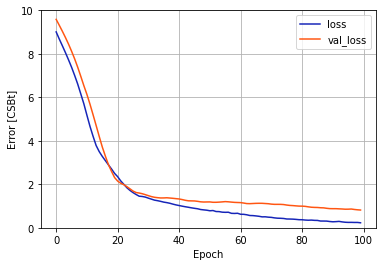

In [78]:
plot_loss(history)

In [79]:
test_results = {}

test_results['Vesc_model'] = Vesc_model.evaluate(
    test_features['Vesc'],
    test_labels, verbose=0)

In [80]:
x = tf.linspace(0.0, 100, 105)
y = Vesc_model.predict(x)

In [81]:
def plot_Vesc(x, y):
  plt.scatter(train_features['Vesc'], train_labels, label='Data', color ='#5458FF')
  plt.plot(x, y, color='#000A45', label='Predictions')
  plt.xlabel('Vesc')
  plt.ylabel('CSBt')
  plt.legend()

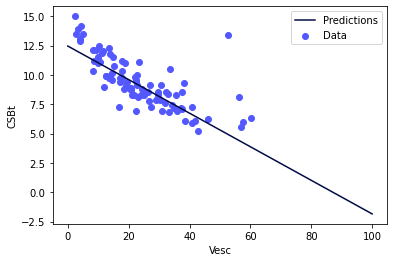

In [82]:
plot_Vesc(x, y)

In [83]:
#####################################
#Linear regression with multiple inputs
#####################################

In [84]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [85]:
linear_model.predict(train_features[:10])

array([[-0.262],
       [ 0.235],
       [-1.395],
       [-1.485],
       [ 0.405],
       [ 0.615],
       [ 0.933],
       [-0.028],
       [ 1.334],
       [ 0.497]], dtype=float32)

In [86]:
linear_model.layers[1].kernel

<tf.Variable 'dense_8/kernel:0' shape=(18, 1) dtype=float32, numpy=
array([[-0.142],
       [ 0.113],
       [ 0.25 ],
       [-0.428],
       [-0.342],
       [ 0.229],
       [ 0.012],
       [ 0.017],
       [ 0.268],
       [-0.381],
       [ 0.293],
       [ 0.194],
       [ 0.546],
       [ 0.155],
       [ 0.354],
       [-0.443],
       [ 0.221],
       [-0.326]], dtype=float32)>

In [87]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [88]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 1.94 s


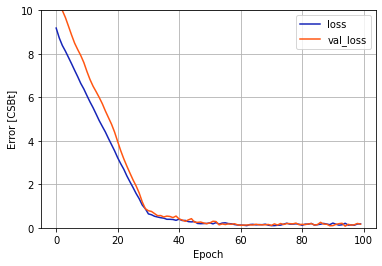

In [89]:
plot_loss(history)

In [90]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [91]:
#####################################
#Regression with a deep neural network (DNN)
###################################

In [92]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [93]:
dnn_Vesc_model = build_and_compile_model(Vesc_normalizer)

In [94]:
dnn_Vesc_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [95]:
%%time
history = dnn_Vesc_model.fit(
    train_features['Vesc'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.11 s


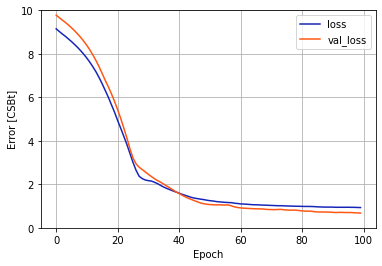

In [96]:
plot_loss(history)

In [97]:
x = tf.linspace(0.0, 100, 105)
y = dnn_Vesc_model.predict(x)

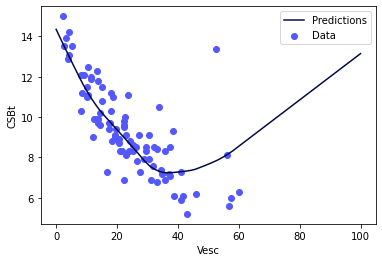

In [98]:
plot_Vesc(x, y)

In [99]:
##########################
#Regression using a DNN and multiple inputs
#################################

In [100]:
test_results['dnn_Vesc_model'] = dnn_Vesc_model.evaluate(
    test_features['Vesc'], test_labels,
    verbose=0)

In [101]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 18)               37        
 n)                                                              
                                                                 
 dense_12 (Dense)            (None, 64)                1216      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,478
Trainable params: 5,441
Non-trainable params: 37
_________________________________________________________________


In [102]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.36 s


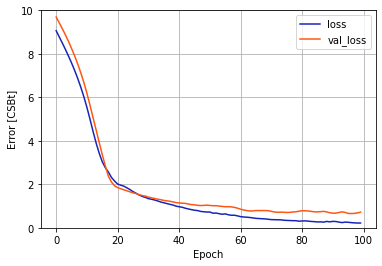

In [103]:
plot_loss(history)

In [104]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [105]:
pd.DataFrame(test_results, index=['Mean absolute error [CSBt]']).T

,Mean absolute error [CSBt]
Vesc_model,1.393166
linear_model,0.246777
dnn_Vesc_model,1.114441
dnn_model,0.693702


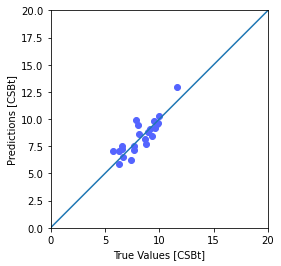

In [108]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal',)
plt.scatter(test_labels, test_predictions, color ='#5464FF')
plt.xlabel('True Values [CSBt]')
plt.ylabel('Predictions [CSBt]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

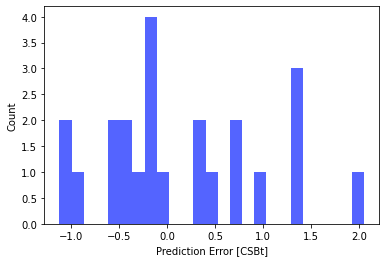

In [110]:
error = test_predictions - test_labels
plt.hist(error, bins=25, color ='#5464FF')
plt.xlabel('Prediction Error [CSBt]')
_ = plt.ylabel('Count')